In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

results_dir = "/vol/miltank/users/frou/Documents/TFM_for_medical_prognosis/NeuralFineGray/experiments/TabPFN_results/cv-experiment-1"

results_raw = []
results_tabpfn = []



In [2]:
results_raw.append(
            {
                "Model": "Cox PH",
                "C-index (train)": "0.63682",
                "C-index (val)": "0.6131",
                "IBS (val)": "0.2025",
                "Time (s)": "None",
            })
results_raw.append(
            {
                "Model": "XGBoost",
                "C-index (train)": "0.8008",
                "C-index (val)": "0.6348",
                "IBS (val)": "0.3360",
                "Time (s)": "None",
            })
results_raw.append(
            {
                "Model": "DeepSurv",
                "C-index (train)": "None",
                "C-index (val)": "None",
                "IBS (val)": "None",
                "Time (s)": "None",
            }
        )
results_raw.append(
            {
                "Model": "RSF",
                "C-index (train)": "0.7475",
                "C-index (val)": "0.6196",
                "IBS (val)": "0.1914",
                "Time (s)": "None",
            })

In [3]:
results_tabpfn.append(
            {
                "Model": "Cox PH",
                "C-index (train)": "0.9568",
                "C-index (val)": "0.5679",
                "IBS (val)": "0.3098",
                "Time (s)": "None",
            })
results_tabpfn.append(
            {
                "Model": "XGBoost",
                "C-index (train)": "0.9899",
                "C-index (val)": "0.6014",
                "IBS (val)": "0.5020",
                "Time (s)": "None",
            })
results_tabpfn.append(
            {
                "Model": "DeepSurv",
                "C-index (train)": "None",
                "C-index (val)": "None",
                "IBS (val)": "None",
                "Time (s)": "None",
            }
        )
results_tabpfn.append(
            {
                "Model": "RSF",
                "C-index (train)": "0.8638",
                "C-index (val)": "0.6106",
                "IBS (val)": "0.2215",
                "Time (s)": "None",
            })

In [4]:
# Helper to convert list-of-dicts to DataFrame with "Method" column
def combine_results(results_dicts, method_name):
    df = pd.DataFrame(results_dicts)
    df["Method"] = method_name
    return df


# Combine all results
all_results = pd.concat(
    [
        combine_results(results_raw, "Raw"),
        combine_results(results_tabpfn, "TabPFN Embeddings"),
    ],
    ignore_index=True,
)

# Metrics to compare
metrics = ["C-index (train)", "C-index (val)", "IBS (val)", "Time (s)"]

# 1) convert metrics in all_results
for m in metrics:
    all_results[m] = pd.to_numeric(all_results[m], errors="coerce")

# 2) NOW build df_raw (it will inherit numeric dtypes)
df_raw = all_results[all_results["Method"] == "Raw"].set_index("Model")

# 3) compute differences
for metric in metrics:
    all_results[f"{metric} to Baseline"] = all_results.apply(
        lambda row: (
            row[metric] - df_raw.loc[row["Model"], metric]
            if row["Method"] != "Raw"
            else 0.0
        ),
        axis=1,
    )

In [5]:
def plot_results_absolute(df_all, results_path):

    sns.set_theme(style="whitegrid", font_scale=1.2)

    # --- Plot C-index (train) ---
    plt.figure(figsize=(8, 5))
    sns.barplot(data=df_all, x="Model", y="C-index (train)", hue="Method")
    plt.title("Train C-index Comparison (Raw vs TabPFN)")
    plt.legend(title="Method", framealpha=0.0)
    plt.tight_layout()
    plt.savefig(results_path + "/tabpfn_C_train.png")

    # --- Plot C-index (val) ---
    plt.figure(figsize=(8, 5))
    sns.barplot(data=df_all, x="Model", y="C-index (val)", hue="Method")
    plt.title("Validation C-index Comparison (Raw vs TabPFN)")
    plt.legend(title="Method", framealpha=0.0)
    plt.tight_layout()
    plt.savefig(results_path + "/tabpfn_C_val.png")

    # --- Plot IBS (val) ---
    plt.figure(figsize=(8, 5))
    sns.barplot(data=df_all, x="Model", y="IBS (val)", hue="Method")
    plt.title("Validation IBS Comparison (lower is better)")
    plt.legend(title="Method", framealpha=0.0)
    plt.tight_layout()
    plt.savefig(results_path + "/tabpfn_IBS.png")

    # --- Plot training time ---
    # plt.figure(figsize=(8, 5))
    # sns.barplot(data=df_all, x="Model", y="Time (s)", hue="Method")
    # plt.title("Training Time by Method (Raw vs TabPFN)")
    # plt.legend(title="Method", framealpha=0.0)
    # plt.tight_layout()
    # plt.savefig(results_path + "/tabpfn_Time.png")


def plot_results_relative(df_all, results_path):
    sns.set_theme(style="whitegrid", font_scale=1.2)

    # --- Plot C-index (train) diff ---
    plt.figure(figsize=(8, 5))
    sns.barplot(
        data=df_all,
        x="Model",
        y="C-index (train) to Baseline",
        hue="Method",
    )
    plt.title("Train C-index Difference to Raw Baseline")
    plt.legend(title="Method", framealpha=0.0)
    plt.tight_layout()
    plt.savefig(results_path + "/tabpfn_C_train_rel.png")

    # --- Plot C-index (val) diff ---
    plt.figure(figsize=(8, 5))
    sns.barplot(
        data=df_all,
        x="Model",
        y="C-index (val) to Baseline",
        hue="Method",
    )
    plt.title("Validation C-index Difference to Raw Baseline")
    plt.legend(title="Method", framealpha=0.0)
    plt.tight_layout()
    plt.savefig(results_path + "/tabpfn_C_val_rel.png")

    # --- Plot IBS (val) diff ---
    plt.figure(figsize=(8, 5))
    sns.barplot(
        data=df_all,
        x="Model",
        y="IBS (val) to Baseline",
        hue="Method",
    )
    plt.title("Validation IBS Difference to Raw Baseline (negative is better)")
    plt.legend(title="Method", framealpha=0.0)
    plt.tight_layout()
    plt.savefig(results_path + "/tabpfn_IBS_rel.png")

    # --- Plot training time diff ---
    plt.figure(figsize=(8, 5))
    sns.barplot(
        data=df_all,
        x="Model",
        y="Time (s) to Baseline",
        hue="Method",
    )
    plt.title("Training Time Difference to Raw Baseline")
    plt.legend(title="Method", framealpha=0.0)
    plt.tight_layout()
    plt.savefig(results_path + "/tabpfn_Time_rel.png")

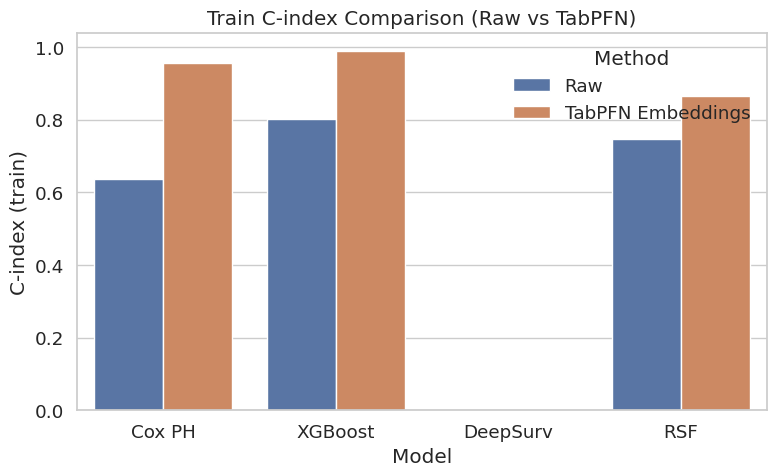

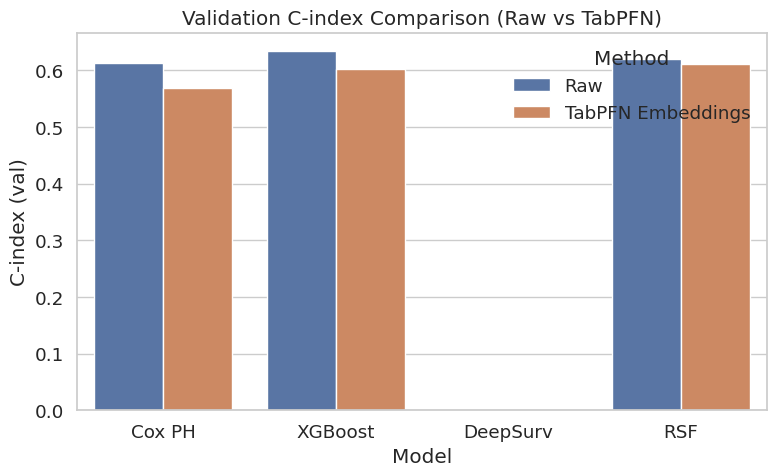

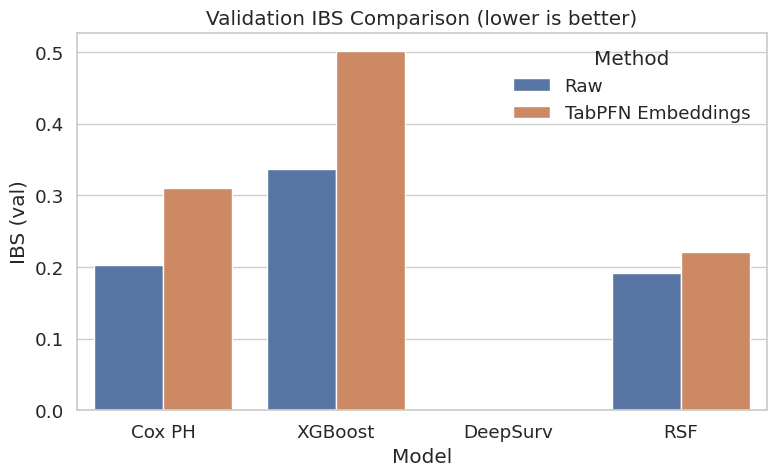

In [6]:
plot_results_absolute(all_results, results_dir)
# plot_results_relative(all_results, results_dir)